In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
%%time
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)

CPU times: user 6.92 s, sys: 613 ms, total: 7.54 s
Wall time: 8.13 s


In [23]:
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [5]:
%%time
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)

CPU times: user 1.68 s, sys: 59.5 ms, total: 1.74 s
Wall time: 1.87 s


In [6]:
release_dates.head()

,title,year,country,date
0,3orthographies,2013,Canada,2013-05-20
1,11 Minutes (I),2014,USA,2014-05-27
2,A Gypsy Girl's Love,1908,USA,1908-08-08
3,A Woman Scorned,1999,USA,1999-08-05
4,A Woman Scorned,1999,Germany,2000-04-09


In [77]:
c = cast
c = c[c.name == 'Michael Caine']
# TODO: sort by release date

,title,year,name,type,character,n
293100,Last Orders,2001,Michael Caine,actor,Jack,1
320263,Morning Departure,1950,Michael Caine,actor,Teaboy,NaN
445522,Mr. Destiny,1990,Michael Caine,actor,Mike,3
579530,Water,1985,Michael Caine,actor,Baxter,1
591985,Batman Begins,2005,Michael Caine,actor,Alfred,2


,title,year,name,type,character,n
3491519,Merrily We Go to Hell,1932,Cary Grant,actor,'DeBrion' in play,9
3522646,Devil and the Deep,1932,Cary Grant,actor,Lt. Jaeckel,4
3421096,Blonde Venus,1932,Cary Grant,actor,Nick Townsend,3
607118,Sinners in the Sun,1932,Cary Grant,actor,Ridgeway,8
3495249,Hot Saturday,1932,Cary Grant,actor,Romer Sheffield,1
3495661,Madame Butterfly,1932,Cary Grant,actor,Lieutenant B.F. Pinkerton,2
1434510,Merrily We Go to Hell,1932,Cary Grant,actor,Charlie Baxter,9
3509208,This Is the Night,1932,Cary Grant,actor,Stephen Mathewson,5
2576403,She Done Him Wrong,1933,Cary Grant,actor,Captain Cummings,2
3478013,The Woman Accused,1933,Cary Grant,actor,Jeffrey Baxter,2


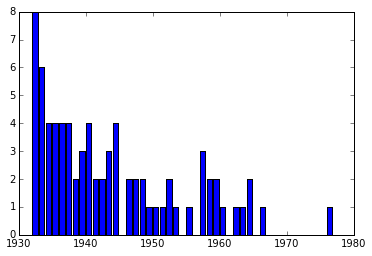

In [123]:
c = cast
c = c[c.name == 'Cary Grant']
c = c[c.n.notnull()]
c = c[c.character != 'Himself']
y = c.year.value_counts()
y.head()
plt.bar(y.index, y)
c.sort('year')

In [102]:
c = cast
c = c[c.name == 'Cary Grant']
c = c[c.n == 1]
y = c.year.value_counts()
y.head()

1940    4
1943    3
1957    3
1944    3
1948    2
dtype: int64

In [106]:
c = cast
c = c[c.name == 'Cary Grant']
c = c[c.n == 2]
y = c.year.value_counts()
y.head()

1937    4
1933    4
1935    3
1938    2
1934    2
dtype: int64

In [ ]:
c = cast
c = c[c.name == 'Cary Grant']
c = c[c.n == 2]
y = c.year.value_counts()
y.head()

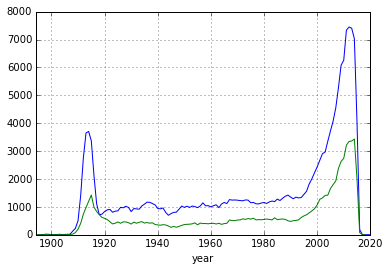

In [93]:
c = cast
c = c[c.n == 1]
m = c[c.type == 'actor']
m = m.groupby('year').size()
f = c[c.type == 'actress']
f = f.groupby('year').size()
i = m.index.union(f.index)
m.reindex(i)
f.reindex(i)
m.plot()
f.plot()

In [83]:
c = cast
c = c[c.year // 10 == 198]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1980  actor      1157
      actress     552
1981  actor      1123
      actress     564
1982  actor      1180
      actress     552
1983  actor      1209
      actress     533
1984  actor      1191
      actress     609
1985  actor      1280
      actress     543
1986  actor      1228
      actress     558
1987  actor      1310
      actress     567
1988  actor      1381
      actress     553
1989  actor      1423
      actress     502
dtype: int64

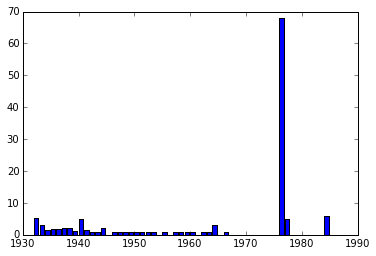

In [78]:
def traj(name):
    c = cast
    c = c[c.name == name]
    c = c[c.n.notnull()]
    c = c.groupby(['year']).n.mean()#notnull().mean()
    #c = c.year.value_counts().sort_index()
    plt.bar(c.index, c)

traj('Cary Grant')

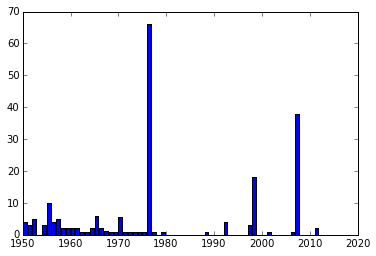

In [72]:
traj('Sidney Poitier')

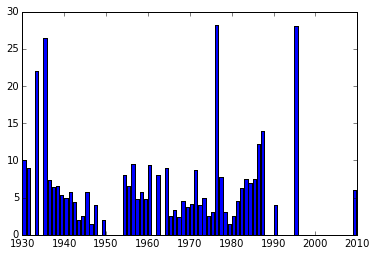

In [73]:
traj('John Carradine')

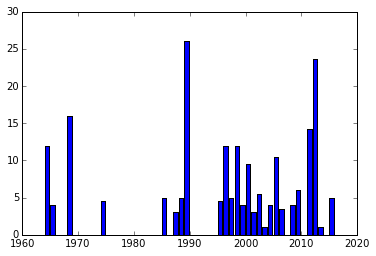

In [74]:
traj('Judi Dench')

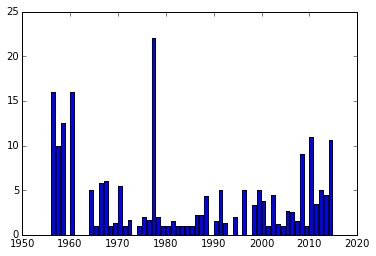

In [75]:
traj('Michael Caine')